In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten ,Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
import os
import random
import numpy as np
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,Activation,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.datasets import mnist
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from PIL import Image
import time
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
import keras

In [8]:
X_train_squirrel = np.load(r'D:\Documents\X_train_squirrel.npy')
X_test_squirrel = np.load(r'D:\Documents\X_test_squirrel.npy')
y_train_squirrel = np.load(r'D:\Documents\y_train_squirrel.npy')
y_test_squirrel = np.load(r'D:\Documents\y_test_squirrel.npy')

print("data loaded")
print(X_train_squirrel.shape)
print(X_test_squirrel.shape)
print(y_train_squirrel.shape)
print(y_test_squirrel.shape)

X_train_person = np.load(r'D:\Documents\X_train_person.npy')
X_test_person = np.load(r'D:\Documents\X_test_person.npy')
y_train_person = np.load(r'D:\Documents\y_train_person.npy')
y_test_person = np.load(r'D:\Documents\y_test_person.npy')

print("data loaded")
print(X_train_person.shape)
print(X_test_person.shape)
print(y_train_person.shape)
print(y_test_person.shape)

data loaded
(1834, 256, 256, 3)
(459, 256, 256, 3)
(1834, 2)
(459, 2)


In [9]:
def getNumpyArray(dir,imageShape=(256,256,3)):
    img = Image.open(dir)
    img = img.resize((imageShape[0], imageShape[1]), Image.ANTIALIAS)
    output = np.array(img, dtype=np.float32)
    return np.array([output], dtype=np.float32)


def run_model(model, image_dir, plot_image=True, cpu_only=False):
    startTime = time.time()
    if cpu_only==True:
        with tf.device("/cpu:0"):
            output_data = np.array(model.predict(getNumpyArray(image_dir)))
            endTime = time.time()
    else:
        output_data = np.array(model.predict(getNumpyArray(image_dir)))
        endTime = time.time()
    classification_time = endTime-startTime
    print(image_dir + ":")
    if plot_image==True:
        imgplot = plt.imshow(getNumpyArray(image_dir)[0]/255)
        plt.show()
    print("Nothing: " + str(np.format_float_positional(output_data[0][0], trim = '-')))
    print("Thing: " + str(np.format_float_positional(output_data[0][1], trim = '-')))
    print("classification time: " + str(classification_time) + " seconds")
    print("---------------------------------------------------------------------")

==] - 52s 569ms/step - loss: 2.7158 - acc: 0.8515 - val_loss: 3.1820 - val_acc: 0.7887
Epoch 25/100
92/92 [==============================] - 52s 568ms/step - loss: 2.9135 - acc: 0.8234 - val_loss: 3.2068 - val_acc: 0.7952
Epoch 26/100
92/92 [==============================] - 52s 567ms/step - loss: 2.7059 - acc: 0.8579 - val_loss: 15.3389 - val_acc: 0.7843
Epoch 27/100
92/92 [==============================] - 52s 566ms/step - loss: 1.4795 - acc: 0.8786 - val_loss: 3.9474 - val_acc: 0.8431
Epoch 28/100
92/92 [==============================] - 52s 566ms/step - loss: 1.6253 - acc: 0.8452 - val_loss: 3.2577 - val_acc: 0.8824
Epoch 29/100
92/92 [==============================] - 52s 565ms/step - loss: 1.5334 - acc: 0.8687 - val_loss: 1.3849 - val_acc: 0.8126
Epoch 30/100
92/92 [==============================] - 52s 565ms/step - loss: 1.9144 - acc: 0.8611 - val_loss: 1.9438 - val_acc: 0.8235
Epoch 31/100
92/92 [==============================] - 52s 565ms/step - loss: 2.7093 - acc: 0.8762 - va

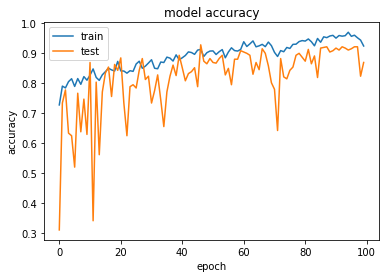

In [17]:
model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation=tf.keras.layers.LeakyReLU(alpha=0.3), input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation=tf.keras.layers.LeakyReLU(alpha=0.3)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.3)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation=tf.keras.layers.LeakyReLU(alpha=0.3)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation=tf.keras.layers.LeakyReLU(alpha=0.3)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.3)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 5, activation=tf.keras.layers.LeakyReLU(alpha=0.3)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = 5, activation=tf.keras.layers.LeakyReLU(alpha=0.3)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = 7, strides=2, padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.3)))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Conv2D(256, kernel_size = 4, activation=tf.keras.layers.LeakyReLU(alpha=0.2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

# use adam optimizer and categorical cross entropy cost
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"]) 
# after each epoch decrease learning rate by 0.95
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.96 ** x)

# train
epochs = 100
j=0

checkpoint_filepath = 'checkpoints'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

start_time = time.time()
history = model.fit(X_train_person, y_train_person, epochs = epochs, validation_data=(X_test_person,y_test_person), batch_size=20, callbacks=[model_checkpoint_callback])
end_time = time.time()


print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(j+1,epochs,history.history['acc'][epochs-1],history.history['val_acc'][epochs-1]))

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("trainingHistory.png")

model.save('C:\\Users\\reidd\\Khaosgun')

In [18]:
modela = keras.models.load_model('C:\\Users\\reidd\\Khaosgun\\checkpoints')
modelb = keras.models.load_model('C:\\Users\\reidd\\Khaosgun')

Model A (checkpoint):
buisness.jpeg:


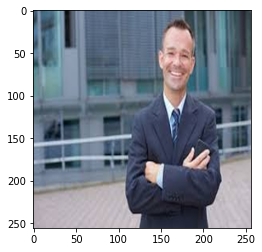

Nothing: 0.2500691
Squirrel: 0.74993086
classification time: 0.314528226852417 seconds
---------------------------------------------------------------------
images.jpg:


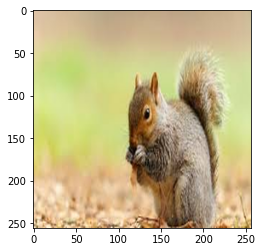

Nothing: 0.000000000000012054857
Squirrel: 1
classification time: 0.11170172691345215 seconds
---------------------------------------------------------------------
man.jpg:


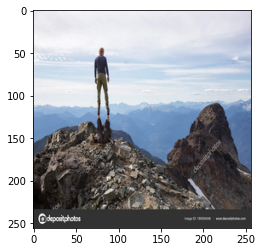

Nothing: 0.0013062025
Squirrel: 0.99869376
classification time: 0.14261913299560547 seconds
---------------------------------------------------------------------
person.jpg:


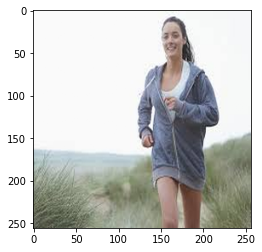

Nothing: 0.0057827705
Squirrel: 0.99421716
classification time: 0.12167501449584961 seconds
---------------------------------------------------------------------
standing.jpg:


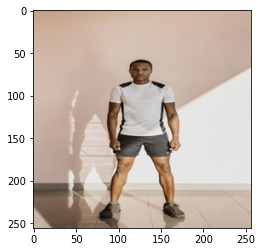

Nothing: 0.00071117503
Squirrel: 0.9992888
classification time: 0.17852282524108887 seconds
---------------------------------------------------------------------
Model B (end model):
buisness.jpeg:


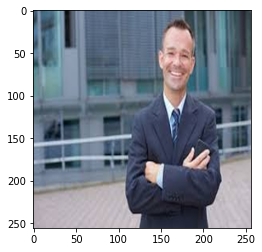

Nothing: 0.0022601923
Squirrel: 0.9977398
classification time: 0.307178258895874 seconds
---------------------------------------------------------------------
images.jpg:


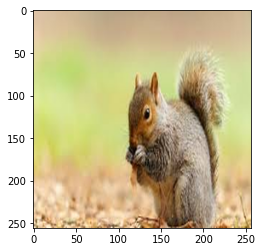

Nothing: 0.0000000000045440227
Squirrel: 1
classification time: 0.1466071605682373 seconds
---------------------------------------------------------------------
man.jpg:


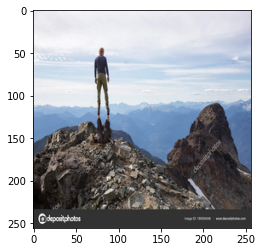

Nothing: 0.0075088893
Squirrel: 0.99249107
classification time: 0.14162111282348633 seconds
---------------------------------------------------------------------
person.jpg:


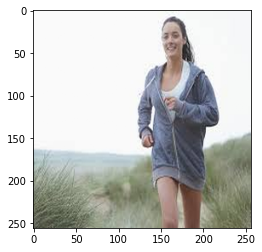

Nothing: 0.015836218
Squirrel: 0.9841638
classification time: 0.18550467491149902 seconds
---------------------------------------------------------------------
standing.jpg:


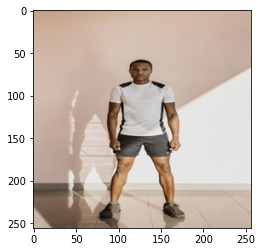

Nothing: 0.00097299437
Squirrel: 0.999027
classification time: 0.12765812873840332 seconds
---------------------------------------------------------------------


In [19]:
print("Model A (checkpoint):")
run_model(modela, "buisness.jpeg", cpu_only = True)
run_model(modela, "images.jpg", cpu_only = True)
run_model(modela, "man.jpg", cpu_only = True)
run_model(modela, "person.jpg", cpu_only = True)
run_model(modela, "standing.jpg", cpu_only = True)
print("Model B (end model):")
run_model(modelb, "buisness.jpeg", cpu_only = True)
run_model(modelb, "images.jpg", cpu_only = True)
run_model(modelb, "man.jpg", cpu_only = True)
run_model(modelb, "person.jpg", cpu_only = True)
run_model(modelb, "standing.jpg", cpu_only = True)